In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

#!pip install TextBlob
from textblob import TextBlob
from textblob import Word

#!pip install transformers
#from transformers import RobertaForSequenceClassification, trainer, 

from nltk.sentiment.vader import SentimentIntensityAnalyzer

#!pip install WordCloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [235]:
df = pd.read_csv("C:/Users/khami/Downloads/tweets_mentioning_Explore_ai_acad.csv")

In [236]:
df.head()

,Unnamed: 0,Date,Username,Tweet
0,0,2023-03-11 06:15:11+00:00,Dante_Manda,@explore_ai_acad I will. Thank you.
1,1,2023-03-09 12:22:03+00:00,explore_ai_acad,@Dante_Manda Applications for the July 2023 co...
2,2,2023-03-09 09:10:46+00:00,Dante_Manda,@explore_ai_acad When are applications opening?
3,3,2023-03-08 14:41:39+00:00,Mr__Nwankwo,@explore_ai_acad Beautiful and interactive space.
4,4,2023-03-07 13:47:56+00:00,_techbarbie_,@alx_africa Please can anyone here answer this...


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   Date        200 non-null    object
 2   Username    200 non-null    object
 3   Tweet       200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [238]:
df1 = df[['Date','Username','Tweet']]

In [239]:
df1.head()

,Date,Username,Tweet
0,2023-03-11 06:15:11+00:00,Dante_Manda,@explore_ai_acad I will. Thank you.
1,2023-03-09 12:22:03+00:00,explore_ai_acad,@Dante_Manda Applications for the July 2023 co...
2,2023-03-09 09:10:46+00:00,Dante_Manda,@explore_ai_acad When are applications opening?
3,2023-03-08 14:41:39+00:00,Mr__Nwankwo,@explore_ai_acad Beautiful and interactive space.
4,2023-03-07 13:47:56+00:00,_techbarbie_,@alx_africa Please can anyone here answer this...


In [240]:
# extracting the number of words in each tweet

df1['word_count'] = df1['Tweet'].apply(lambda x: len(str(x).split(" ")))
df1[['Tweet','word_count']].head()

,Tweet,word_count
0,@explore_ai_acad I will. Thank you.,5
1,@Dante_Manda Applications for the July 2023 co...,23
2,@explore_ai_acad When are applications opening?,5
3,@explore_ai_acad Beautiful and interactive space.,5
4,@alx_africa Please can anyone here answer this...,32


In [241]:
# calculating the number of characters in each tweet.

df1['char_count'] = df1['Tweet'].str.len() ## this also includes spaces
df1[['Tweet','char_count']].head()

,Tweet,char_count
0,@explore_ai_acad I will. Thank you.,35
1,@Dante_Manda Applications for the July 2023 co...,146
2,@explore_ai_acad When are applications opening?,47
3,@explore_ai_acad Beautiful and interactive space.,49
4,@alx_africa Please can anyone here answer this...,203


In [242]:
# calculating the average word length of each tweet.

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df1['avg_word'] = df1['Tweet'].apply(lambda x: avg_word(x))
df1[['Tweet','avg_word']].head()

,Tweet,avg_word
0,@explore_ai_acad I will. Thank you.,6.200000
1,@Dante_Manda Applications for the July 2023 co...,5.391304
2,@explore_ai_acad When are applications opening?,8.600000
3,@explore_ai_acad Beautiful and interactive space.,9.000000
4,@alx_africa Please can anyone here answer this...,5.516129


In [243]:
# calculating the number of stopwords

stop = stopwords.words('english')

df1['stopwords'] = df1['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1[['Tweet','stopwords']].head()

,Tweet,stopwords
0,@explore_ai_acad I will. Thank you.,0
1,@Dante_Manda Applications for the July 2023 co...,9
2,@explore_ai_acad When are applications opening?,1
3,@explore_ai_acad Beautiful and interactive space.,1
4,@alx_africa Please can anyone here answer this...,14


In [244]:
# calculating the number of hashtags

df1['hastags'] = df1['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df1[['Tweet','hastags']].head()

,Tweet,hastags
0,@explore_ai_acad I will. Thank you.,0
1,@Dante_Manda Applications for the July 2023 co...,0
2,@explore_ai_acad When are applications opening?,0
3,@explore_ai_acad Beautiful and interactive space.,0
4,@alx_africa Please can anyone here answer this...,0


In [245]:
# transform our tweets into lower case.

df1['Tweet'] = df1['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['Tweet'].head()

0                  @explore_ai_acad i will. thank you.
1    @dante_manda applications for the july 2023 co...
2      @explore_ai_acad when are applications opening?
3    @explore_ai_acad beautiful and interactive space.
4    @alx_africa please can anyone here answer this...
Name: Tweet, dtype: object

In [246]:
# removing punctuation

df1['Tweet'] = df1['Tweet'].str.replace('#','')
df1['Tweet'].head()

0                  @explore_ai_acad i will. thank you.
1    @dante_manda applications for the july 2023 co...
2      @explore_ai_acad when are applications opening?
3    @explore_ai_acad beautiful and interactive space.
4    @alx_africa please can anyone here answer this...
Name: Tweet, dtype: object

In [247]:
# Removing stop Words

df1['Tweet'] = df1['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df1['Tweet'].head()

0                    @explore_ai_acad will. thank you.
1    @dante_manda applications july 2023 cohort ope...
2               @explore_ai_acad applications opening?
3        @explore_ai_acad beautiful interactive space.
4    @alx_africa please anyone answer question. dat...
Name: Tweet, dtype: object

In [248]:
# calculating the number of stopwords again

stop = stopwords.words('english')

df1['stopwords'] = df1['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1[['Tweet','stopwords']].head()

,Tweet,stopwords
0,@explore_ai_acad will. thank you.,0
1,@dante_manda applications july 2023 cohort ope...,0
2,@explore_ai_acad applications opening?,0
3,@explore_ai_acad beautiful interactive space.,0
4,@alx_africa please anyone answer question. dat...,0


In [249]:
# check the 10 most frequently occurring words in our text data 

freq = pd.Series(' '.join(df1['Tweet']).split()).value_counts()[:10]
freq

data                  118
datascience            85
exploreaiacademy       63
dataengineering        58
@explore_ai_acad       48
exploredatascience     42
science                41
know                   21
explorers              19
us                     19
dtype: int64

In [250]:
# removal of the most frequently occurring words from the text.

freq = list(freq.index)
df1['Tweet'] = df1['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df1['Tweet'].head()

0                                     will. thank you.
1    @dante_manda applications july 2023 cohort ope...
2                                applications opening?
3                         beautiful interactive space.
4    @alx_africa please anyone answer question. pro...
Name: Tweet, dtype: object

In [251]:
# check the 10 rarely occurring words in our text data
 
freq = pd.Series(' '.join(df1['Tweet']).split()).value_counts()[-10:]
freq

recruiting                 1
techtalent                 1
@sharonjebitok             1
https://t.co/inekk0gqxx    1
soon.                      1
closing                    1
https://t.co/4mfc2yqvso    1
days.                      1
https://t.co/q2wnju4yhk    1
https://t.co/7nivjwmxni    1
dtype: int64

In [252]:
# removal of the rarely occurring words from the text.

freq = list(freq.index)
df1['Tweet'] = df1['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df1['Tweet'].head()

0                                     will. thank you.
1    @dante_manda applications july 2023 cohort ope...
2                                applications opening?
3                         beautiful interactive space.
4    @alx_africa please anyone answer question. pro...
Name: Tweet, dtype: object

In [253]:
# Spelling correction

df1['Tweet'].apply(lambda x: str(TextBlob(x).correct()))

0                                       will. thank you.
1      @dante_manda applications july 2023 short open...
2                                  applications opening?
3                           beautiful interactive space.
4      @alx_africa please anyone answer question. pro...
                             ...                        
195    there's less one week left apply! ⌛ waiting fo...
196    want study engineering, busy schedule can't fu...
197    skill tools need analyst? comment let think ot...
198    machine learning programming. mathematics stat...
199    machine learning (my) subjects paradigms incre...
Name: Tweet, Length: 200, dtype: object

In [254]:
df1['Tweet'] = df1['Tweet'].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
df1.head()

C:\Users\khami\AppData\Local\Temp\ipykernel_19744\4215193925.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Tweet'] = df1['Tweet'].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()


,Date,Username,Tweet,word_count,char_count,avg_word,stopwords,hastags
0,2023-03-11 06:15:11+00:00,Dante_Manda,will. thank you.,5,35,6.200000,0,0
1,2023-03-09 12:22:03+00:00,explore_ai_acad,@dante_manda applications july 2023 cohort ope...,23,146,5.391304,0,0
2,2023-03-09 09:10:46+00:00,Dante_Manda,applications opening?,5,47,8.600000,0,0
3,2023-03-08 14:41:39+00:00,Mr__Nwankwo,beautiful interactive space.,5,49,9.000000,0,0
4,2023-03-07 13:47:56+00:00,_techbarbie_,@alx_africa please anyone answer question. pro...,32,203,5.516129,0,0


In [255]:
freq = pd.Series(' '.join(df1['Tweet']).split()).value_counts()[-10:]
freq

either           1
later            1
changed,         1
accelerator      1
careerchanger    1
engineering.     1
16th             1
says             1
site             1
recently.        1
dtype: int64

In [256]:
# Tokenization 

TextBlob(df1['Tweet'][1]).words

WordList(['dante_manda', 'applications', 'july', '2023', 'cohort', 'open', 'mid-april', 'keep', 'eye', 'social', 'media', 'accounts', 'updates', 'announcements'])

In [257]:
# Stemming

#st = PorterStemmer()
#df1['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [258]:
# Lemmatization

df1['Tweet'] = df1['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df1['Tweet'].head()

0                                     will. thank you.
1    @dante_manda application july 2023 cohort open...
2                                 application opening?
3                         beautiful interactive space.
4    @alx_africa please anyone answer question. pro...
Name: Tweet, dtype: object

In [259]:
# Term frequency

# tf1 = (df1['Tweet'][1:3]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
# tf1.columns = ['words','tf']
# tf1

In [260]:
# Inverse Document Frequency

# for i,word in enumerate(tf1['words']):
#    tf1.loc[i, 'idf'] = np.log(df1.shape[0]/(len(df1[df1['Tweet'].str.contains(word)])))

# tf1

In [261]:
# Term Frequency – Inverse Document Frequency (TF-IDF)

# tf1['tfidf'] = tf1['tf'] * tf1['idf']
# tf1

In [262]:
# Sentiment Analysis

#df1['sentiment'] = df1['Tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
#df1[['Tweet','sentiment']].head()

In [263]:
SIA = SentimentIntensityAnalyzer()

In [264]:
df1['scores'] = df1['Tweet'].apply(lambda text: SIA.polarity_scores(text))
df1.head(5)

,Date,Username,Tweet,word_count,char_count,avg_word,stopwords,hastags,scores
0,2023-03-11 06:15:11+00:00,Dante_Manda,will. thank you.,5,35,6.200000,0,0,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp..."
1,2023-03-09 12:22:03+00:00,explore_ai_acad,@dante_manda application july 2023 cohort open...,23,146,5.391304,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2023-03-09 09:10:46+00:00,Dante_Manda,application opening?,5,47,8.600000,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2023-03-08 14:41:39+00:00,Mr__Nwankwo,beautiful interactive space.,5,49,9.000000,0,0,"{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'comp..."
4,2023-03-07 13:47:56+00:00,_techbarbie_,@alx_africa please anyone answer question. pro...,32,203,5.516129,0,0,"{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp..."


In [265]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"
df1['label'] =df1['scores'].apply(lambda x: sentimentPredict(x))
df1.head(2)

,Date,Username,Tweet,word_count,char_count,avg_word,stopwords,hastags,scores,label
0,2023-03-11 06:15:11+00:00,Dante_Manda,will. thank you.,5,35,6.200000,0,0,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",Positive
1,2023-03-09 12:22:03+00:00,explore_ai_acad,@dante_manda application july 2023 cohort open...,23,146,5.391304,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


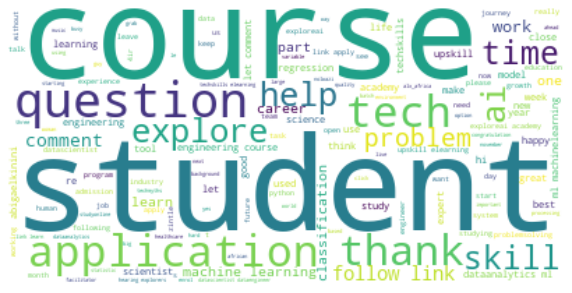

In [266]:
# building a word cloud

Sentiments = df1.Tweet.str.cat()
wordcloud = WordCloud(background_color='white').generate(Sentiments)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [267]:
#TEXT BLOB

# split the data into Negative (Sentiment is between -1 and -0.5), Neutral (Sentiment between -0.5 and 0.5)
# and Positive (Sentiments between 0.5 and 1)

#negative = df1[(df1['sentiment'] >= -1.0) & (df1['sentiment'] <= -0.5)]
#neutral = df1[(df1['sentiment'] > -0.5) & (df1['sentiment'] < 0.5)]
#positive = df1[(df1['sentiment'] >= 0.5) & (df1['sentiment'] <= 1)]

# Transform to single string
# negative_str = negative.sentiment.str.cat()
#neutral_str = neutral.Tweet.str.cat()
#positive_str = positive.Tweet.str.cat()
#negative_str = negative.Tweet.str.cat()

In [268]:
# split the data into Negative (Sentiment is between -1 and -0.5), Neutral (Sentiment between -0.5 and 0.5)
# and Positive (Sentiments between 0.5 and 1)

negative = df1[(df1['label'] == 'Negative') ]
neutral = df1[(df1['label'] == 'Neutral') ]
positive = df1[(df1['label'] == 'Positive') ]

# Transform to single string
# negative_str = negative.sentiment.str.cat()
neutral_str = neutral.Tweet.str.cat()
positive_str = positive.Tweet.str.cat()
negative_str = negative.Tweet.str.cat()

In [269]:
negative.head()

,Date,Username,Tweet,word_count,char_count,avg_word,stopwords,hastags,scores,label
11,2023-01-18 07:44:07+00:00,Grace_DOTA,i'm currently technical issue i'm unable login...,25,170,5.840000,0,0,"{'neg': 0.141, 'neu': 0.733, 'pos': 0.126, 'co...",Negative
41,2022-12-13 10:48:05+00:00,explore_ai_acad,"meet matt! 🧑‍🚀 matt got first job 2020, spendi...",39,293,5.928571,0,4,"{'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'comp...",Negative
80,2022-10-28 10:36:01+00:00,explore_ai_acad,healthcare! 🧑‍⚕️ used reduce common error heal...,22,200,6.960000,0,4,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",Negative
93,2022-10-14 10:21:01+00:00,explore_ai_acad,"study now, pay you’re hired! 🧑‍🎓 isa allows st...",30,273,6.941176,0,3,"{'neg': 0.096, 'neu': 0.904, 'pos': 0.0, 'comp...",Negative
99,2022-09-29 09:20:02+00:00,explore_ai_acad,don’t worry tuition. we’ve got covered 🧑‍🎓 fiv...,34,291,6.578947,0,3,"{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...",Negative


In [270]:
positive.head()

,Date,Username,Tweet,word_count,char_count,avg_word,stopwords,hastags,scores,label
0,2023-03-11 06:15:11+00:00,Dante_Manda,will. thank you.,5,35,6.200000,0,0,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",Positive
3,2023-03-08 14:41:39+00:00,Mr__Nwankwo,beautiful interactive space.,5,49,9.000000,0,0,"{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'comp...",Positive
4,2023-03-07 13:47:56+00:00,_techbarbie_,@alx_africa please anyone answer question. pro...,32,203,5.516129,0,0,"{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",Positive
6,2023-03-06 11:58:25+00:00,explore_ai_acad,join tonight 7pm eat twitter space exploreai e...,35,267,6.189189,0,5,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",Positive
7,2023-03-03 15:58:00+00:00,explore_ai_acad,"excited announce partnership @alx_africa, afri...",30,227,6.322581,0,2,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp...",Positive


In [271]:
neutral.head()

,Date,Username,Tweet,word_count,char_count,avg_word,stopwords,hastags,scores,label
1,2023-03-09 12:22:03+00:00,explore_ai_acad,@dante_manda application july 2023 cohort open...,23,146,5.391304,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,2023-03-09 09:10:46+00:00,Dante_Manda,application opening?,5,47,8.600000,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
5,2023-03-06 17:03:28+00:00,Ndaruga2,@alx_africa link corrupted,7,53,6.714286,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
8,2023-03-02 07:49:14+00:00,tech_financials,sa startup exploreai academy partner alx train...,19,164,7.684211,0,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
9,2023-02-15 10:10:02+00:00,wethinkcode,calling coder ⬇️⬇️⬇️ @umuziorg @girlcode_za @g...,13,146,10.153846,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


Text(0.5, 1.0, 'Reviews with Neutral Sentiments')

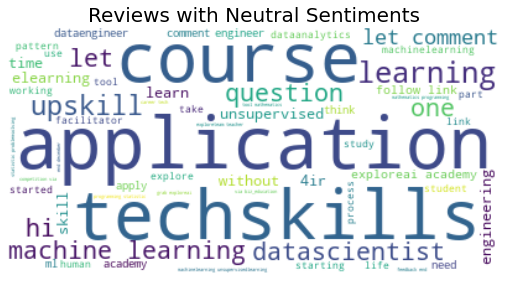

In [272]:
# generate a wordcloud for neutral sentiments

wordcloud_neutral = WordCloud(background_color='white').generate(neutral_str)

# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_neutral,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Neutral Sentiments',fontsize=20)

Text(0.5, 1.0, 'Reviews with Positive Sentiments')

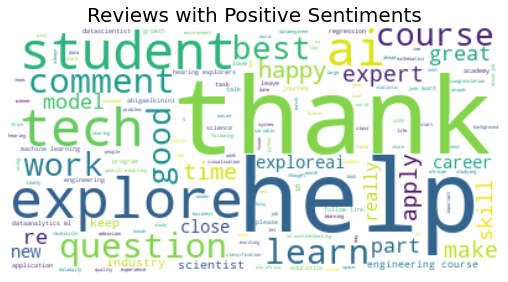

In [273]:
# generate a wordcloud for positive sentiments

wordcloud_positive = WordCloud(background_color='white').generate(positive_str)

# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_positive,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Positive Sentiments',fontsize=20)

Text(0.5, 1.0, 'Reviews with Negative Sentiments')

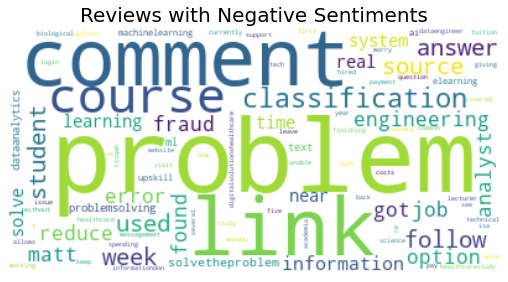

In [274]:
wordcloud_negative = WordCloud(background_color= 'white').generate(negative_str) 

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Sentiments',fontsize=20)

In [275]:
print("Total no of positive tweets: ", df1.label[df1['label']== 'Positive'].count())
print("Total no of neutral tweets: ", df1.label[df1['label']== 'Neutral'].count())
print("Total no of negative tweets: ", df1.label[df1['label']== 'Negative'].count())

Total no of positive tweets:  115
Total no of neutral tweets:  69
Total no of negative tweets:  16


c:\Users\khami\anaconda3\anaconda3_\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

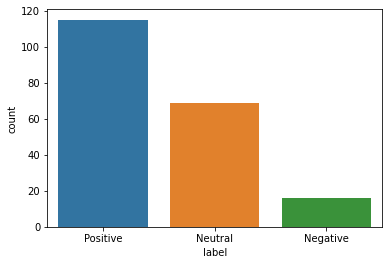

In [276]:
import seaborn as sns 

sns.countplot(df1['label'], label='count')